# Determinación de reactividad

## Reactividad en función del período

Dado que luego de transcurrido el tiempo del transitorio el flujo evoluciona con una única raíz que caracteriza el período asintótico es útil notar la relación entre el período y la reactividad que se obtiene de usar que las raices son solución de la ecuación \textit{in-hour} y que por lo tanto deben satisfacer

\begin{equation}
\$=\frac{\Lambda^*}{T}+\sum_{i=1}^{6}\frac{b_i}{1+\lambda_iT}
\end{equation} 

Esta relación es muy útil experimentalmente ya que estando en la región asintótica se puede determinar el período y a partir de este determinar la reactividad.


## Método del rod-drop 

La solución de la densidad de flujo ante un salto en reactividad, considerando un grupo de neutrones retardados viene dada por

\begin{equation}
\frac{n(t)}{n_0}=-\frac{\beta}{\rho-\beta}e^{\frac{-\lambda\rho}{(\rho-\beta)}t}+\frac{\rho}{\rho-\beta}e^{\frac{\rho-\beta}{\Lambda}t}
\end{equation}

Analizaremos la aproximación de salto instanténo que permitirá determinar experimentalmente el cambio en reactividad insertada con el método del Rod-drop.

Las aproximaciones que se asumen son

* Salto instantáneo: Asume que el término instantáneo decae muy rápido
	\begin{equation}
	\frac{n(t)}{n_0}\approx-\frac{1}{$-1}e^{-\frac{\lambda$}{$-1}t}
	\end{equation}
	
* Fuente retardada: Presume que el término retardado permanece constante.
	\begin{equation}
	\frac{n(t)}{n_0}\approx-\frac{1}{$-1}+\frac{$}{$-1}e^{\frac{$-1}{\Lambda^{*}}t}
	\end{equation}


El método del rod-drop asume que el termino de los neutrones retardados no cambia y asuminos que el término instantáneo ya se hizo cero, luego para un valor de flujo inmediato al cambio en reactividad ($n_p$) debe cumplirse

\begin{equation}
\frac{n_p}{n_0}=-\frac{1}{$-1}
\end{equation}
por lo tanto de esta expresión y determinando experimentalmente el nivel de flujo previo al salto y su inmediato valor posterior podemos expresar la reactividad, en dolares, como

\begin{equation}
\$=1-\frac{n_0}{n_p}
\end{equation}


## Reactímetro

Se resuelve de forma numérica la cinética puntual y a partir de los datos provenientes de los detectores neutrónicos que proporocionan una señal proporcional a la densidad neutrónica se estima el valor de reactividad.


# Análisis de datos experimentales

Un reactor experimental es controlado por cuatro barras de control y se determina que la configuración de crítico es $BC_1=BC_2=BC_4=100\%$;$BC_3=50.3\%$.

A continuación se presenta una tabla de calibración de la $BC_3$ mediante el método de compensación
	
$$
\begin{aligned}
& \text {Calibración por compensación introduciendo BC3 y extrayendo BC1 }\\
&\begin{array}{ccc}
\hline \hline \text { $BC_3$ } & \text { $BC_1$ } & \text { $\$$ }  \\
\hline 50.3 & 100 & 0 \\
54.5 & 100 & ? \\
54.5 & 80.8 & 0  \\
57.8 & 80.8 & 0.106\pm0.003  \\
57.8 & 74.6 & 0  \\
61.2 & 74.6 & 0.106\pm0.003  \\
61.2 & 70 & 0 \\
65 & 70 & 0.107\pm0.003  \\
65 & 65.9 & 0  \\
69 & 65.9 & 0.103\pm0.003  \\
69 & 62.3 & 0  \\
73.8 & 62.3 & 0.111\pm0.003  \\
73.8 & 58.8 & 0  \\
79.5 & 58.8 & 0.102\pm0.003  \\
79.5 & 55.7 & 0  \\
84.8 & 55.7 & 0.068\pm0.003  \\
84.8 & 53.7 & 0 \\
100 & 53.7 & 0.0862\pm0.003  \\
100 & 51.3 & 0  \\
\hline
\end{array}
\end{aligned}
$$


Como puede observar hay un paso que resta completar. Para ello usted cuenta con los datos correspondientes a dicho paso y en este apartado tendrá la oportunidad de estimar el valor en reactividad usando el método del período:


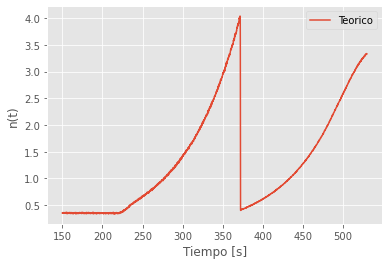

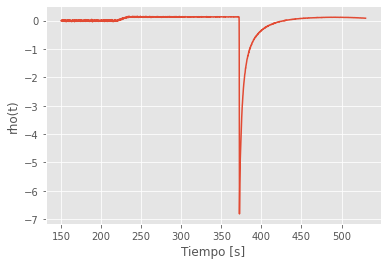

[375.1 375.2 375.3 ... 529.8 529.9 530. ]
[0.43034442 0.42889784 0.42666192 ... 3.33547513 3.33595518 3.33301364]


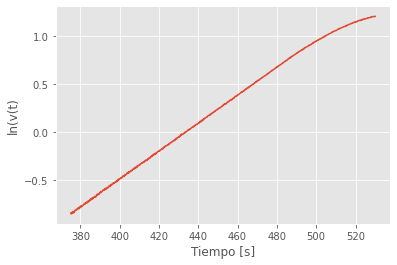

Pendiente: 
 [[0.0139414]]
Ordenada: 
 [-6.05100001]
[[0.0139414]]


In [33]:
fic = open('CalibPeriodo.txt', "r")
lines = []
for line in fic:
    lines.append(line)
fic.close()  

t = []
n = []
rho = []
for k in list(range(1,(len(lines)))):
    a = lines[k].split()
    t.append(float(a[0]))
    n.append(float(a[1]))
    rho.append(float(a[2]))
    
#print(t)    

import matplotlib.pyplot as plt

plt.xlabel('Tiempo [s]')
plt.ylabel('n(t)')
plt.figure(1)
plt.plot(t,n,label='Teorico')
#plt.plot(tteo,nsalt,label='Salto')
#plt.plot(tteo,nret,label='Fuente retardada')
leg=plt.legend()
plt.show()

plt.xlabel('Tiempo [s]')
plt.ylabel('rho(t)')
plt.figure(1)
plt.plot(t,rho,label='Teorico')
plt.show()

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


tajus = np.array(t, dtype=np.float64)
najus = np.array(n, dtype=np.float64)

t1 = tajus[tajus > 375]
n1 = najus[tajus > 375]

print(t1)
print(n1)

# Datos para ajustar
y1 = np.log(n1)

plt.xlabel('Tiempo [s]')
plt.ylabel('ln(v(t)')
plt.figure(1)
plt.plot(t1,y1,label='Ajuste ln')
plt.show()


# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(t1.reshape(-1,1), y1.reshape(-1,1))
# Información del modelo
# ==============================================================================
print('Pendiente: \n', modelo.coef_)
print('Ordenada: \n', modelo.intercept_)

T = modelo.coef_

print(T)


## Reactividad de apagado

Partiendo de la configuración de crítico de este reactor se produjo un SCRAM. En el archivo $\color{red}{\text{pirulo}}$ usted tiene la señal proveniente de uno de los detectores durante dicha experiencia. 

In [ ]:
Finalmente usted está en condiciones de evaluar el FSR